In [1]:
!pip install scikit-image matplotlib numpy gdown

In [2]:
import gdown

# Descargar la imagen
image_url = 'https://drive.google.com/uc?id=19fhcTeMIACnUiukaqsBapSwFeiidG57J'
image_path = 'image.jpg'
gdown.download(image_url, image_path, quiet=False)

# Descargar la mascara
mask_url = 'https://drive.google.com/uc?id=1C3XJ8ThxUL4HDPOM3VViFirjNRk8HmuY'
mask_path = 'mask.jpg'
gdown.download(mask_url, mask_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=19fhcTeMIACnUiukaqsBapSwFeiidG57J
To: /content/image.jpg
100%|██████████| 19.7k/19.7k [00:00<00:00, 28.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C3XJ8ThxUL4HDPOM3VViFirjNRk8HmuY
To: /content/mask.jpg
100%|██████████| 10.7k/10.7k [00:00<00:00, 12.1MB/s]


'mask.jpg'

#Recorte

Downloading...
From: https://drive.google.com/uc?id=19fhcTeMIACnUiukaqsBapSwFeiidG57J
To: /content/image.jpg
100%|██████████| 19.7k/19.7k [00:00<00:00, 57.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C3XJ8ThxUL4HDPOM3VViFirjNRk8HmuY
To: /content/mask.jpg
100%|██████████| 10.7k/10.7k [00:00<00:00, 12.5MB/s]


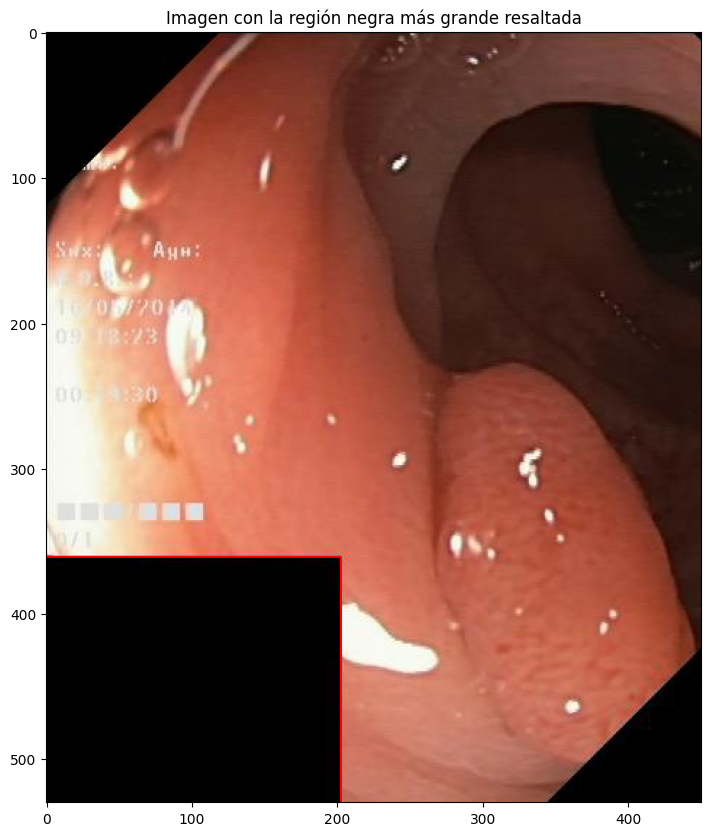

El área de la región negra más grande es 34307 píxeles.


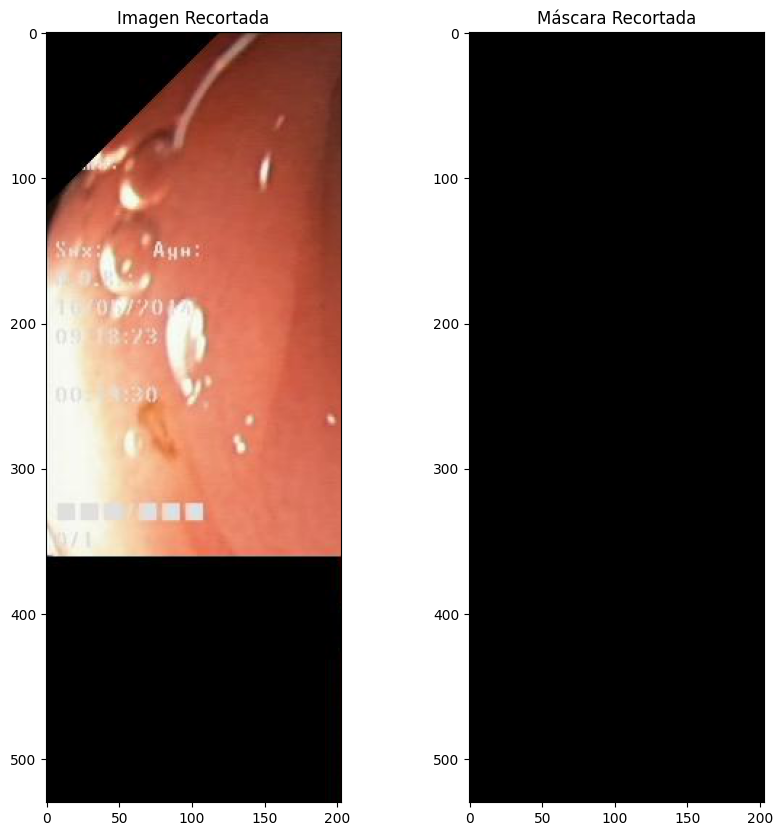

<ipython-input-8-ea17c912a3d4>:68: UserWarning: mask_cropped.jpg is a low contrast image
  skimage.io.imsave('mask_cropped.jpg', mask_cropped)


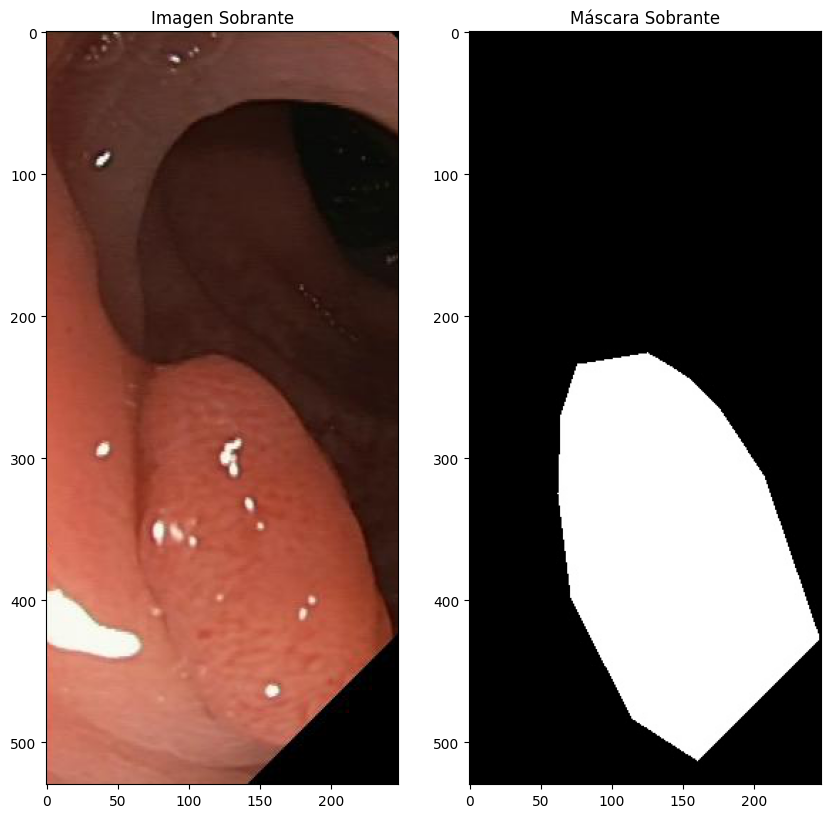

In [8]:
import skimage
from skimage import io
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Descarga la imagen
image_url = 'https://drive.google.com/uc?id=19fhcTeMIACnUiukaqsBapSwFeiidG57J'
image_path = 'image.jpg'
gdown.download(image_url, image_path, quiet=False)

# Descarga la máscara
mask_url = 'https://drive.google.com/uc?id=1C3XJ8ThxUL4HDPOM3VViFirjNRk8HmuY'
mask_path = 'mask.jpg'
gdown.download(mask_url, mask_path, quiet=False)

# Lee la imagen y la máscara
img = skimage.io.imread(image_path)
mask = skimage.io.imread(mask_path)

# Convierte la imagen a escala de grises
gray = skimage.color.rgb2gray(img)

# Identifica los pixeles negros en la imagen
binary = gray < 0.1  # Ajusta este valor según sea necesario para identificar el color negro

# Etiqueta las regiones de la imagen
labels = label(binary)

# Encuentra la región negra más grande
regions = regionprops(labels)
largest_region = max(regions, key=lambda region: region.area)

# Muestra la imagen original con la región negra más grande resaltada
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.contour(labels == largest_region.label, colors='red')
plt.title('Imagen con la región negra más grande resaltada')
plt.show()

print(f"El área de la región negra más grande es {largest_region.area} píxeles.")

# Define si el recorte será vertical u horizontal
cut = "horizontal"  # Cambia a "horizontal" para un corte horizontal

# Recorta la imagen y la máscara alrededor de la región negra más grande
minr, minc, maxr, maxc = largest_region.bbox
if cut == "vertical":
    img_cropped = img[minr:maxr, :]
    mask_cropped = mask[minr:maxr, :]
else:  # cut == "horizontal"
    img_cropped = img[:, minc:maxc]
    mask_cropped = mask[:, minc:maxc]

# Muestra la imagen y la máscara recortadas
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_cropped)
plt.title('Imagen Recortada')
plt.subplot(1, 2, 2)
plt.imshow(mask_cropped)
plt.title('Máscara Recortada')
plt.show()

# Guarda la imagen y la máscara recortadas
skimage.io.imsave('img_cropped.jpg', img_cropped)
skimage.io.imsave('mask_cropped.jpg', mask_cropped)

# Define las regiones sobrantes de la imagen y la máscara
if cut == "vertical":
    if minr > 0:
        img_remaining = img[:minr, :]
        mask_remaining = mask[:minr, :]
    else:
        img_remaining = img[maxr:, :]
        mask_remaining = mask[maxr:, :]
else:  # cut == "horizontal"
    if minc > 0:
        img_remaining = img[:, :minc]
        mask_remaining = mask[:, :minc]
    else:
        img_remaining = img[:, maxc:]
        mask_remaining = mask[:, maxc:]

# Verificar si las regiones sobrantes son no vacías antes de mostrar y guardar
if img_remaining.size > 0 and mask_remaining.size > 0:
    # Muestra la imagen y la máscara sobrantes
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img_remaining)
    plt.title('Imagen Sobrante')
    plt.subplot(1, 2, 2)
    plt.imshow(mask_remaining)
    plt.title('Máscara Sobrante')
    plt.show()

    # Guarda la imagen y la máscara sobrantes
    skimage.io.imsave('img_remaining.jpg', img_remaining)
    skimage.io.imsave('mask_remaining.jpg', mask_remaining)
else:
    print("No hay imagen/máscara sobrante después del recorte.")

#Recorte para las mil imagenes

In [ ]:
import os
import zipfile
import skimage
from skimage import io
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt

# Descomprime el archivo zip
with zipfile.ZipFile('/content/segmented_images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Obtiene las rutas a todas las imágenes y las máscaras
img_paths = sorted(os.listdir('/content/segmented-images/images'))
mask_paths = sorted(os.listdir('/content/segmented-images/masks'))

# Procesa cada imagen y máscara
for img_path, mask_path in zip(img_paths, mask_paths):
    # Lee la imagen y la máscara
    img = skimage.io.imread('/content/segmented-images/images/' + img_path)
    mask = skimage.io.imread('/content/segmented-images/masks/' + mask_path)

    # Convierte la imagen a escala de grises
    gray = skimage.color.rgb2gray(img)

    # Identifica los pixeles negros en la imagen
    binary = gray < 0.1  # Ajusta este valor según sea necesario para identificar el color negro

    # Etiqueta las regiones de la imagen
    labels = label(binary)

    # Encuentra la región negra más grande
    regions = regionprops(labels)
    largest_region = max(regions, key=lambda region: region.area)

    # Define si el recorte será vertical u horizontal
    cut = "horizontal"  # Cambia a "horizontal" para un corte horizontal

    # Recorta la imagen y la máscara alrededor de la región negra más grande
    minr, minc, maxr, maxc = largest_region.bbox
    if cut == "vertical":
        img_cropped = img[minr:maxr, :]
        mask_cropped = mask[minr:maxr, :]
    else:  # cut == "horizontal"
        img_cropped = img[:, minc:maxc]
        mask_cropped = mask[:, minc:maxc]

    # Guarda la imagen y la máscara recortadas
    skimage.io.imsave('img_cropped.jpg', img_cropped)
    skimage.io.imsave('mask_cropped.jpg', mask_cropped)

    # Define las regiones sobrantes de la imagen y la máscara
    if cut == "vertical":
        if minr > 0:
            img_remaining = img[:minr, :]
            mask_remaining = mask[:minr, :]
        else:
            img_remaining = img[maxr:, :]
            mask_remaining = mask[maxr:, :]
    else:  # cut == "horizontal"
        if minc > 0:
            img_remaining = img[:, :minc]
            mask_remaining = mask[:, :minc]
        else:
            img_remaining = img[:, maxc:]
            mask_remaining = mask[:, maxc:]

    # Verifica si las regiones sobrantes están vacías
    if img_remaining.size != 0 and mask_remaining.size != 0:
        # Crea los directorios si no existen
        if not os.path.exists('/content/sample_data/imagen'):
            os.makedirs('/content/sample_data/imagen')
        if not os.path.exists('/content/sample_data/mascaras'):
            os.makedirs('/content/sample_data/mascaras')

        # Guarda las imágenes y las máscaras sobMis disculpas por el corte abrupto.


        # Guarda las imágenes y las máscaras sobrantes
        skimage.io.imsave('/content/sample_data/imagen/' + img_path, img_remaining)
        skimage.io.imsave('/content/sample_data/mascaras/' + mask_path, mask_remaining)
'''
import shutil

# Crea una carpeta temporal para almacenar los archivos que se van a comprimir
os.makedirs('/content/sample_data/temp', exist_ok=True)

# Mueve los archivos de imagen y máscara a la carpeta temporal
shutil.move('/content/sample_data/imagen', '/content/sample_data/temp')
shutil.move('/content/sample_data/mascaras', '/content/sample_data/temp')

# Crea un nuevo archivo ZIP
with zipfile.ZipFile('/content/sample_data/remaining_files.zip', 'w') as zipf:
    # Recorre todos los archivos en la carpeta temporal
    for foldername, subfolders, filenames in os.walk('/content/sample_data/temp'):
        for filename in filenames:
            # Crea la ruta completa del archivo
            file_path = os.path.join(foldername, filename)
            # Agrega el archivo al archivo ZIP
            zipf.write(file_path, arcname=os.path.relpath(file_path, '/content/sample_data/temp'))

# Elimina la carpeta temporal y su contenido
shutil.rmtree('/content/sample_data/temp')
'''

#Escalado de imagenes

In [ ]:
from skimage.transform import resize

# Define una función para escalar imágenes
def scale_image(image, new_shape):
    return resize(image, new_shape)

# Define el nuevo tamaño al que quieres escalar las imágenes
new_shape = (256, 256)

# Define los directorios de entrada y salida
input_image_dir = '/content/sample_data/imagen/'
input_mask_dir = '/content/sample_data/mascaras/'
output_image_dir = '/content/sample_data/scaled_imagen/'
output_mask_dir = '/content/sample_data/scaled_mascaras/'

# Crea los directorios de salida si no existen
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)

# Obtiene las rutas a todas las imágenes y máscaras
img_paths = sorted(os.listdir(input_image_dir))
mask_paths = sorted(os.listdir(input_mask_dir))

# Procesa cada imagen y máscara
for img_path, mask_path in zip(img_paths, mask_paths):
    # Lee la imagen y la máscara
    img = skimage.io.imread(input_image_dir + img_path)
    mask = skimage.io.imread(input_mask_dir + mask_path)

    # Escala la imagen y la máscara al nuevo tamaño
    img_scaled = scale_image(img, new_shape)
    mask_scaled = scale_image(mask, new_shape)

    # Guarda la imagen y la máscara escaladas
    skimage.io.imsave(output_image_dir + img_path, img_scaled)
    skimage.io.imsave(output_mask_dir + mask_path, mask_scaled)
'''
import shutil
# Crea una carpeta temporal para almacenar los archivos que se van a comprimir
os.makedirs('/content/sample_data/temp_scaled', exist_ok=True)

# Mueve los archivos de imagen y máscara escalados a la carpeta temporal
shutil.move(output_image_dir, '/content/sample_data/temp_scaled')
shutil.move(output_mask_dir, '/content/sample_data/temp_scaled')

# Crea un nuevo archivo ZIP
with zipfile.ZipFile('/content/sample_data/scaled_files.zip', 'w') as zipf:
    # Recorre todos los archivos en la carpeta temporal
    for foldername, subfolders, filenames in os.walk('/content/sample_data/temp_scaled'):
        for filename in filenames:
            # Crea la ruta completa del archivo
            file_path = os.path.join(foldername, filename)
            # Agrega el archivo al archivo ZIP
            zipf.write(file_path, arcname=os.path.relpath(file_path, '/content/sample_data/temp_scaled'))

# Elimina la carpeta temporal y su contenido
shutil.rmtree('/content/sample_data/temp_scaled')
'''